<a href="https://colab.research.google.com/github/abrunagomes/estatistica-com-seaborn/blob/main/EDA_Gorjetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('tips.csv')

In [ ]:
dados.head

<bound method NDFrame.head of      total_bill   tip dessert   day    time  size
0         16.99  1.01      No   Sun  Dinner     2
1         10.34  1.66      No   Sun  Dinner     3
2         21.01  3.50      No   Sun  Dinner     3
3         23.68  3.31      No   Sun  Dinner     2
4         24.59  3.61      No   Sun  Dinner     4
..          ...   ...     ...   ...     ...   ...
239       29.03  5.92      No   Sat  Dinner     3
240       27.18  2.00     Yes   Sat  Dinner     2
241       22.67  2.00     Yes   Sat  Dinner     2
242       17.82  1.75      No   Sat  Dinner     2
243       18.78  3.00      No  Thur  Dinner     2

[244 rows x 6 columns]>

In [ ]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [ ]:
renomear = {
    'total_bill' : 'valor_da_conta',
    'tip' : 'gorjeta',
    'dessert' : 'sobremesa',
    'day' : 'dia_da_semana',
    'time' : 'hora',
     'size' : 'total_de_pessoas'
}

In [ ]:
gorjetas = dados.rename(columns = renomear)

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [ ]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
sim_nao = {
    'No' : 'Não',
    'Yes' : 'Sim'
}

In [ ]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [ ]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [ ]:
dias = {
    'Sun' : 'Domingo',
    'Sat' : 'Sábado',
    'Thur' : 'Quinta',
    'Fri' : 'Sexta'
}

In [ ]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


In [ ]:
gorjetas.dia_da_semana.map

<bound method Series.map of 0      Domingo
1      Domingo
2      Domingo
3      Domingo
4      Domingo
        ...   
239     Sábado
240     Sábado
241     Sábado
242     Sábado
243     Quinta
Name: dia_da_semana, Length: 244, dtype: object>

In [ ]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

In [ ]:
gorjetas.hora.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [ ]:
hora = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}

In [ ]:
gorjetas.hora = gorjetas.hora.map(hora)

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [ ]:
gorjetas.hora.unique()

array(['Jantar', 'Almoço'], dtype=object)

In [ ]:
!pip install seaborn==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 208 kB 4.9 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [ ]:
import seaborn as sns

In [ ]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana', 'hora',
       'total_de_pessoas'],
      dtype='object')

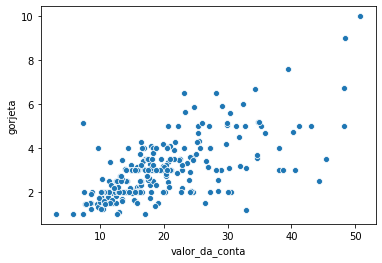

In [ ]:
sns.scatterplot(x = 'valor_da_conta', y = 'gorjeta', data=gorjetas)

In [ ]:
print('A base de dadoscontém {} registros \n'.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

A base de dadoscontém 244 registros 

Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora                244
total_de_pessoas    244
dtype: int64

In [ ]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [ ]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


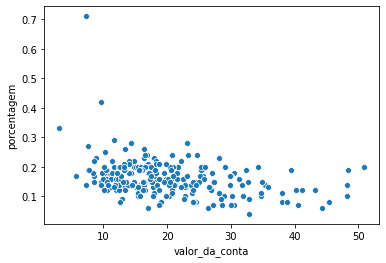

In [ ]:
porcentagem_conta =sns.scatterplot(x = 'valor_da_conta', y = 'porcentagem', data=gorjetas)

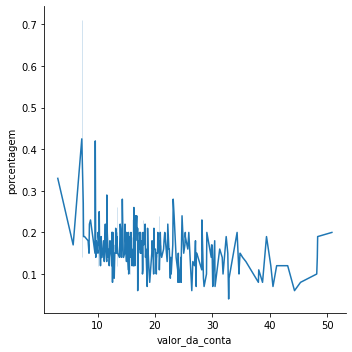

In [ ]:
porcentagem_conta_linha =sns.relplot(x = 'valor_da_conta', y = 'porcentagem', data=gorjetas, kind='line')

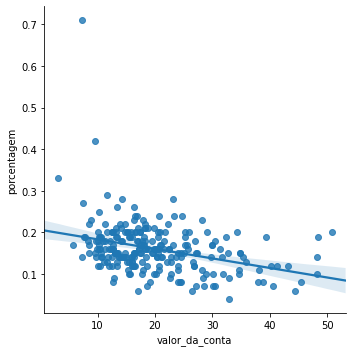

In [ ]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', data=gorjetas)

In [ ]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [ ]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


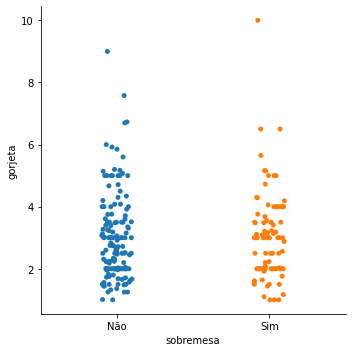

In [ ]:
sns.catplot(x = 'sobremesa', y = 'gorjeta', data=gorjetas)

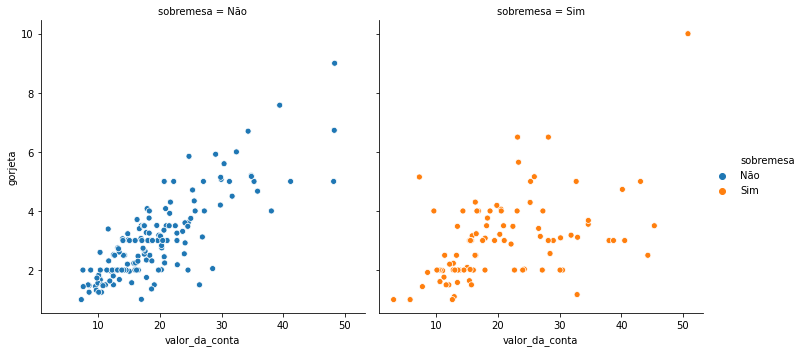

In [ ]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

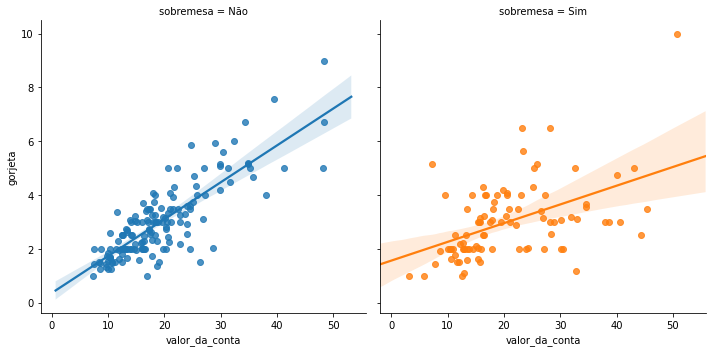

In [ ]:
sns.lmplot(x = 'valor_da_conta', y = 'gorjeta',col='sobremesa', hue='sobremesa', data=gorjetas)

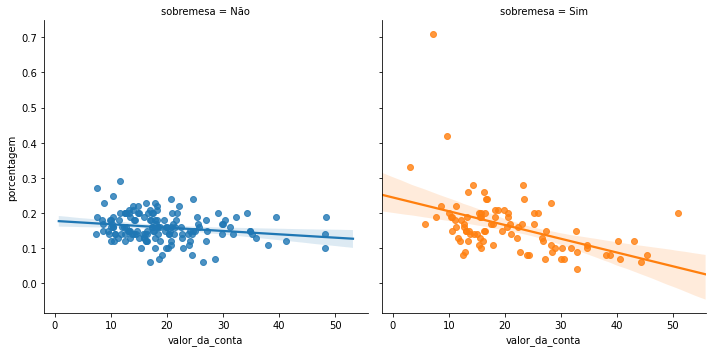

In [ ]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem',col='sobremesa', hue='sobremesa', data=gorjetas)

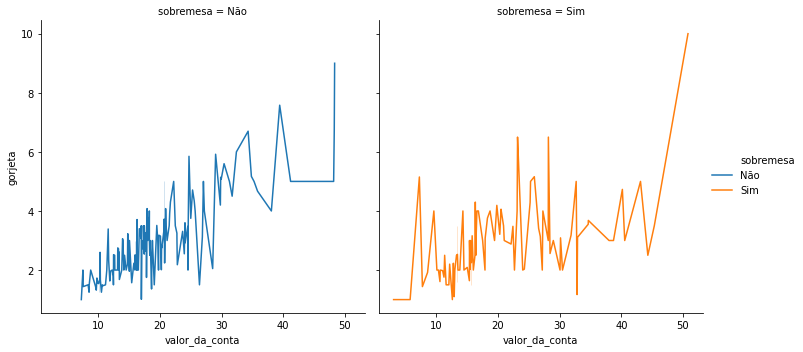

In [ ]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue='sobremesa', col='sobremesa',kind='line', data=gorjetas)

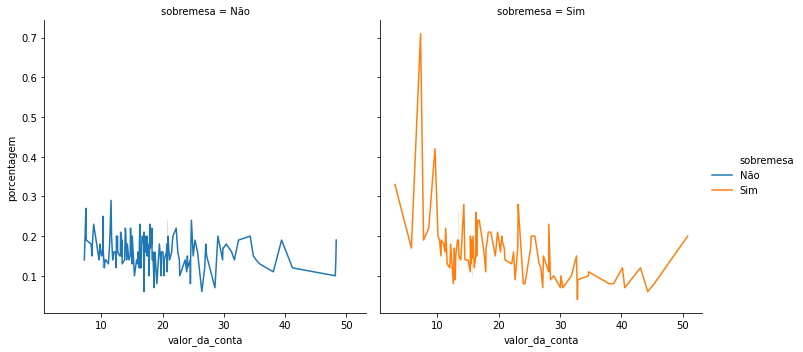

In [ ]:
sns.relplot(x = 'valor_da_conta', y = 'porcentagem', hue='sobremesa', col='sobremesa',kind='line', data=gorjetas)

In [ ]:
from scipy.stats import ranksums

In [ ]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [ ]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [ ]:
sem_sobremesa

0      0.06
1      0.16
2      0.17
3      0.14
4      0.15
       ... 
235    0.12
238    0.13
239    0.20
242    0.10
243    0.16
Name: porcentagem, Length: 151, dtype: float64

In [ ]:
sobremesa

56     0.08
58     0.16
60     0.16
61     0.14
62     0.18
       ... 
234    0.19
236    0.08
237    0.04
240    0.07
241    0.09
Name: porcentagem, Length: 93, dtype: float64

In [ ]:
r = ranksums(sobremesa, sem_sobremesa)

In [ ]:
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.5266635660124415


In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [ ]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

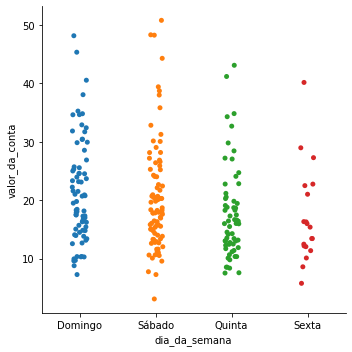

In [ ]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

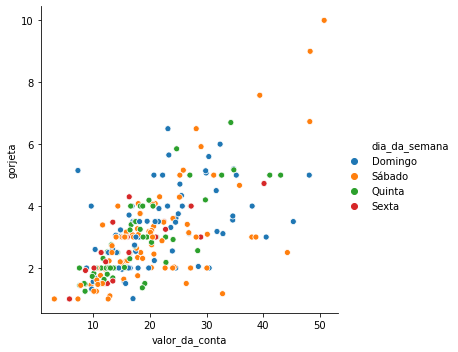

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta',hue='dia_da_semana', data=gorjetas)

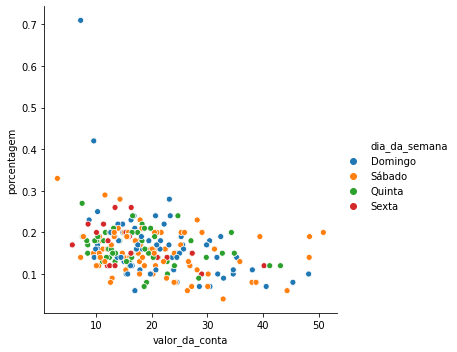

In [ ]:
sns.relplot(x='valor_da_conta', y='porcentagem',hue='dia_da_semana', data=gorjetas)

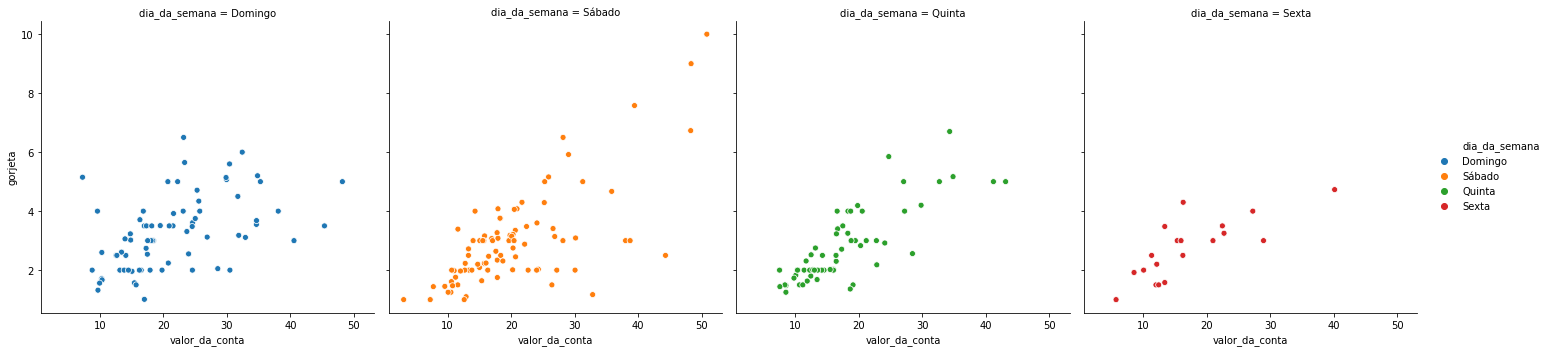

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta',hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

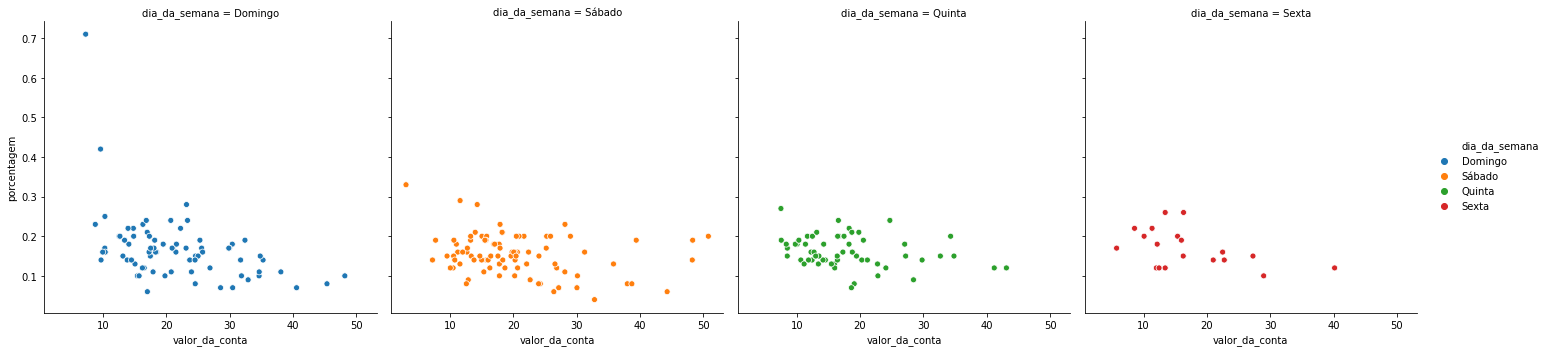

In [ ]:
sns.relplot(x='valor_da_conta', y='porcentagem',hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

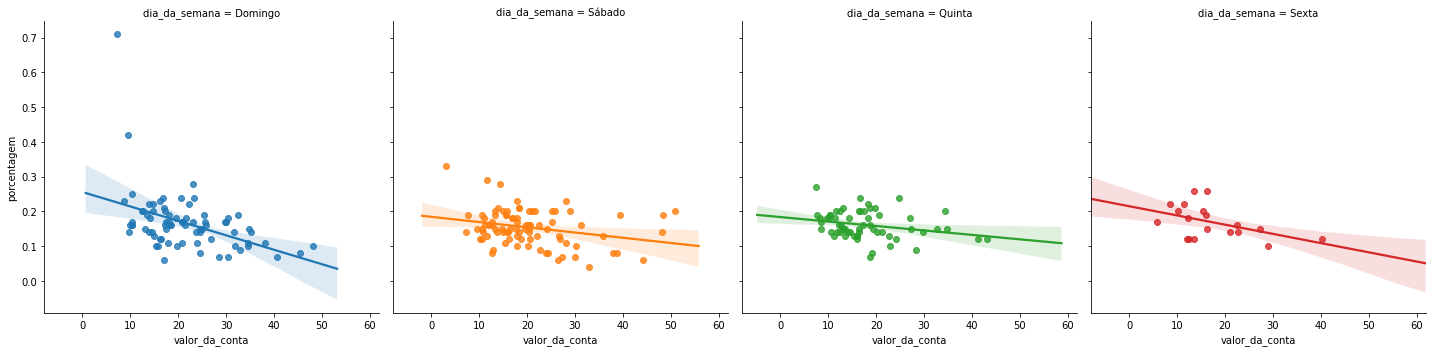

In [ ]:
sns.lmplot(x='valor_da_conta', y='porcentagem',hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [ ]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [ ]:
print('A média geral das gorjetas é {}'.format(media_geral_gorjetas))

A média geral das gorjetas é 2.99827868852459


In [ ]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [ ]:
print('Frequencia dos dias')
gorjetas.dia_da_semana.value_counts()

Frequencia dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

In [ ]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [ ]:
valor_conta_domingo

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
186    20.90
187    30.46
188    18.15
189    23.10
190    15.69
Name: valor_da_conta, Length: 76, dtype: float64

In [ ]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [ ]:
valor_conta_sabado

19     20.65
20     17.92
21     20.29
22     15.77
23     39.42
       ...  
238    35.83
239    29.03
240    27.18
241    22.67
242    17.82
Name: valor_da_conta, Length: 87, dtype: float64

In [ ]:
r2 = ranksums(valor_conta_sabado, valor_conta_domingo)

In [ ]:
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.3576728477868443


In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [ ]:
gorjetas.hora.unique()

array(['Jantar', 'Almoço'], dtype=object)

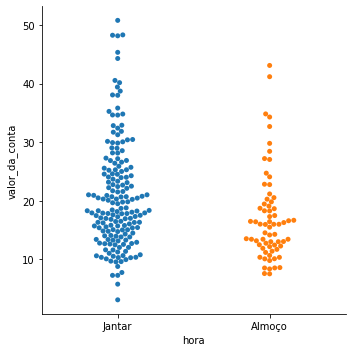

In [ ]:
sns.catplot(x='hora', y='valor_da_conta', kind='swarm', data=gorjetas)

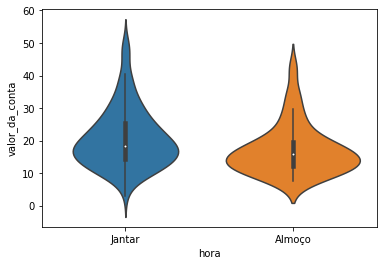

In [ ]:
sns.violinplot(x='hora', y='valor_da_conta', data=gorjetas)

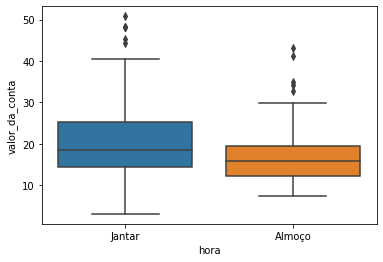

In [ ]:
sns.boxplot(x='hora', y='valor_da_conta', data=gorjetas)

In [ ]:
almoco = gorjetas.query("hora == 'Almoço'").valor_da_conta

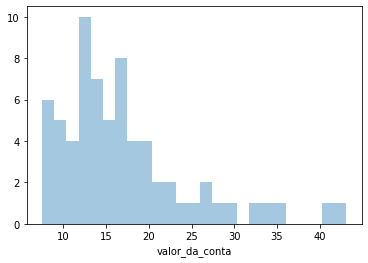

In [ ]:
sns.distplot(almoco, kde=False, bins = 25)

In [ ]:
jantar = gorjetas.query("hora == 'Jantar'").valor_da_conta

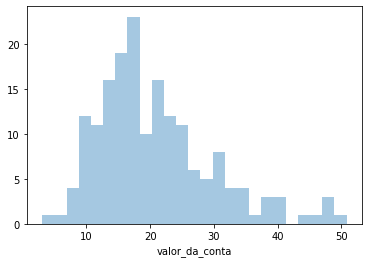

In [ ]:
sns.distplot(jantar, kde=False, bins = 25)

In [ ]:
gorjetas.groupby(['hora']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


In [ ]:
r2 = ranksums(almoco, jantar)

In [ ]:
print('O valor do p-value é de {}'.format(r2.pvalue))

O valor do p-value é de 0.0011791039723641672


In [ ]:
porcentagem_almoco = gorjetas.query("hora == 'Almoço'").porcentagem

In [ ]:
porcentagem_jantar = gorjetas.query("hora == 'Jantar'").porcentagem

In [ ]:
r3 = ranksums(porcentagem_almoco, porcentagem_jantar)

In [ ]:
print('O valor do p-value é de {}'.format(r3.pvalue))

O valor do p-value é de 0.2602493995587126
